### This transcript calculates transmission and reflection for a TM incident wave with arbitrary angle of incident from a N-layer 2D system (x, z) exp(ikr-iwt)

In [272]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import math
import cmath
from scipy.linalg import expm

In [273]:
epsilon_0 = 8.85e-12;
mu_0 = 1.26e-6;
N = 2     # N is the number of layers inclusing the two semi infinite layers so N>1
N_d = 1   # N_d is the resolution for distance of dipole from the surface
N_z = 20  # N_z is the resolution for calculationg the fields
N_x = 20
N_lambda = 1
N_kx = 1

In [274]:
# alpha_** are the elements of the polarizability matrix

alpha_ee = 2
alpha_mm = 1
alpha_em = 0.1
alpha_me = alpha_em

In [275]:
n = np.ones((N,1),dtype = complex)

# n is the refractive indecies for the N layers

In [276]:
permit = n**2

# permit is a Nx1 matrix of the permittivity of the layers

In [277]:

if N-1 == 1:
    z = np.array([np.linspace(0, 0e-9, 2)])
    z = np.array([[z[0][1]]])
else:
    z = np.array([np.linspace(0, 0e-9, N-1)])
    
# Z is the position of the interfaces of the layers

In [278]:
z_obs = np.array([np.linspace(-75e-9, 75e-9, N_z)]);  #this matrix shows the z component of the points in which the fields are being calculated
x = np.array([np.linspace(0, 150e-9, N_x)]); 

z_layer = np.ones((z_obs.shape), dtype = int);

In [279]:
for i_layer in range(0,z_obs.shape[1]):
    if z_obs[0][i_layer] > 0:
        z_layer[0][i_layer] = z_layer[0][i_layer] + 1

In [280]:
#d is the distance of the dipole from the surface.

if N_d == 1 :
    d = np.array([np.linspace(0,300*1e-9, 2)])
    d = np.array([[d[0][1]]])   
else:
    d = np.array([np.linspace(0,300*1e-9, N_d)]) 

In [281]:
c_0 = 3e8;

if N_lambda == 1 :
    lambda_0 = np.array([np.linspace(300e-9, 300e-9, 2)])
    lambda_0 = np.array([[lambda_0[0][1]]])   
else:
    lambda_0 = np.array([np.linspace(300e-9, 300e-9, N_lambda)]) 


w = 2*np.pi*c_0/lambda_0
k_0 = w/c_0;

if N_kx == 1 :
    k_x = np.array([np.linspace(0, (k_0[0]*15*n[0])[0], 2)])
    k_x =  np.array([[k_x[0][1]]])
else:
    k_x = np.array([np.linspace(0, (k_0[0]*15*n[0])[0], N_kx)])
#c_0 is the speed of light in vacuum. w is the angular frequency. 
#lambda_0 is the wavelength in vacuum and k_0 is the wave number in vacuum.

In [282]:
# [r, t]= meshgrid(k_x, lambda_0);

r_p = np.zeros((lambda_0.shape[1],k_x.shape[1]), dtype = complex)
t_p = np.zeros((lambda_0.shape[1],k_x.shape[1]), dtype = complex)
R_p = np.zeros((lambda_0.shape[1],k_x.shape[1]), dtype = complex)
T_p = np.zeros((lambda_0.shape[1],k_x.shape[1]), dtype = complex)

#t and r are Transmission and reflection for H and T and R are transmission and reflection for power.

In [283]:
r_s = np.zeros((lambda_0.shape[1],k_x.shape[1]), dtype = complex)
t_s = np.zeros((lambda_0.shape[1],k_x.shape[1]), dtype = complex)
R_s = np.zeros((lambda_0.shape[1],k_x.shape[1]), dtype = complex)
T_s = np.zeros((lambda_0.shape[1],k_x.shape[1]), dtype = complex)

In [284]:
H_y = np.zeros((N_z, N_x), dtype = complex);
E_x = np.zeros((N_z, N_x), dtype = complex);
E_z = np.zeros((N_z, N_x), dtype = complex);
S_x = np.zeros((1, N_z), dtype = complex);
S_y = np.zeros((1, N_z), dtype = complex);
S_z = np.zeros((1, N_z), dtype = complex);
Le_x = np.zeros((1, N_z), dtype = complex);
Le_y = np.zeros((1, N_z), dtype = complex);
Le_z = np.zeros((1, N_z), dtype = complex);
Lm_x = np.zeros((1, N_z), dtype = complex);
Lm_y = np.zeros((1, N_z), dtype = complex);
Lm_z = np.zeros((1, N_z), dtype = complex);
U = np.zeros((1, N_z), dtype = complex);

In [285]:
F_gf_matrix = np.zeros((N_lambda, N_kx, 3));
F_rp_matrix = np.zeros((N_lambda, N_kx, 3));
F_esd_matrix = np.zeros((N_lambda, N_kx, 3));
F_matrix = np.zeros((N_lambda, N_kx, 3));

In [286]:
ro = r_s;
# ro is W-LDOS defined in "Quantum nanophotonics using HMM" apendix C.

In [287]:
x_plot, z_plot = np.meshgrid(x/lambda_0, z_obs/lambda_0);
#k_x_normalized and lambda_normalized are used for plotting

In [300]:
for i_d in range(0,N_d):
    for i_lambda in range(0,N_lambda):
        n[0] = 3.5;
        n[N-1] = 1;
        
        if N_kx == 1:
            k_x = np.array([np.linspace(k_0[i_lambda], k_0[i_lambda]/math.sqrt(2)*n[0], 2)])
            k_x = np.array([k_x[0][1]])
        else:
            k_x = np.array([np.linspace(k_0[i_lambda], k_0[i_lambda]/math.sqrt(2)*n[0], N_kx)])
            
        permit= n**2;
        for i_kx in range(0,N_kx):
            
            k_z = ((np.ones((N, 1),dtype = np.complex_)*(k_0[i_lambda-1]*n))**2 - k_x[i_kx-1]**2)**0.5
            #k_z is a Nx1 matrix of the wavenumbers along the z direction for rach layer
            
            M_p = np.identity(2,dtype = complex);
            for i_layer in range(0,N-1):
                 M_p = np.dot(M_p,np.dot(np.linalg.inv((np.array([[cmath.exp(1j*k_z[i_layer]*z[i_layer]),0],[0,cmath.exp(-1j*k_z[i_layer]*z[i_layer])]])))\
                ,np.dot(np.linalg.inv((np.array([[1, 1],[(k_z[i_layer]/permit[i_layer])[0], (-k_z[i_layer]/permit[i_layer])[0]]])))\
                ,np.dot((np.array([[1, 1],[(k_z[i_layer+1]/permit[i_layer+1])[0], (-k_z[i_layer+1]/permit[i_layer+1])[0]]]))\
                ,(np.array([[cmath.exp(1j*(k_z[i_layer+1]*z[i_layer])[0]), 0],[0, cmath.exp(-1j*(k_z[i_layer+1]*z[i_layer])[0])]]))))))
              
                
            #M is a 2x2 matrix which relates the amplitudes of the waves in the last layer to those of the first one
            M_s = np.identity(2,dtype = complex)
            for i_layer in range(0,N-1):
                 M_s = np.dot(M_s,np.dot(np.linalg.inv((np.array([[cmath.exp(1j*k_z[i_layer]*z[i_layer]),0],[0,cmath.exp(-1j*k_z[i_layer]*z[i_layer])]])))\
                ,np.dot(np.linalg.inv((np.array([[1, 1],[(k_z[i_layer])[0], (-k_z[i_layer])[0]]])))\
                ,np.dot((np.array([[1, 1],[(k_z[i_layer+1])[0], (-k_z[i_layer+1])[0]]]))\
                ,(np.array([[cmath.exp(1j*(k_z[i_layer+1]*z[i_layer])[0]), 0],[0, cmath.exp(-1j*(k_z[i_layer+1]*z[i_layer])[0])]]))))))
            
            
            t_p[i_lambda, i_kx] = (1/M_p[0, 0])*cmath.exp(1j*k_z[i_layer+1]*z[i_layer])
            r_p[i_lambda, i_kx] = M_p[1, 0]/M_p[0, 0]
            T_p[i_lambda, i_kx] = abs(t_p[i_lambda, i_kx])**2/abs(n[N-1])
            R_p[i_lambda, i_kx] = abs(r_p[i_lambda, i_kx])**2 
            
            t_s[i_lambda, i_kx] = (1/M_p[0, 0])*cmath.exp(1j*k_z[i_layer+1]*z[i_layer])
            r_s[i_lambda, i_kx] = M_p[1, 0]/M_p[0, 0]
            T_s[i_lambda, i_kx] = abs(t_s[i_lambda, i_kx])**2/abs(n[N-1])
            R_s[i_lambda, i_kx] = abs(r_s[i_lambda, i_kx])**2
            
            amp = np.zeros((2, N), dtype = complex)
            vamp = np.zeros((2, N), dtype = complex)
            amp[:,0] = np.array([[1 , r_p[0][0]]])
            
            for i_layer in range(1,N):
                amp[:,i_layer] = np.dot(np.dot(np.linalg.inv((np.array([[cmath.exp(1j*k_z[i_layer]*z[i_layer-1]),0],[0,cmath.exp(-1j*k_z[i_layer]*z[i_layer-1])]])))\
                ,np.dot(np.linalg.inv((np.array([[1, 1],[(k_z[i_layer]/permit[i_layer])[0], (-k_z[i_layer]/permit[i_layer])[0]]])))\
                ,np.dot((np.array([[1, 1],[(k_z[i_layer-1]/permit[i_layer-1])[0], (-k_z[i_layer-1]/permit[i_layer-1])[0]]]))\
                ,(np.array([[cmath.exp(1j*(k_z[i_layer-1]*z[i_layer-1])[0]), 0],[0, cmath.exp(-1j*(k_z[i_layer-1]*z[i_layer-1])[0])]]))))), amp[:,i_layer - 1])
                
            amp[1][-1] = 0    
            
            for i_point in range(0,N_z):
                temp2 = np.array([amp[:,(z_layer[0][i_point] - 1)]]).reshape(2,1)
                temp3 = np.array([np.exp(1j*k_x[i_kx]*x[0])])           
                temp = np.array([[cmath.exp(1j * k_z[z_layer[0][i_point] - 1] * z_obs[0][i_point]), cmath.exp(-1j * k_z[z_layer[0][i_point] - 1] * z_obs[0][i_point])]])
                H_y[i_point,:] = np.dot(np.dot(temp,temp2),temp3)
                
                
                temp4 = np.array([[cmath.exp(1j * k_z[z_layer[0][i_point] - 1] * z_obs[0][i_point]), -cmath.exp(-1j * k_z[z_layer[0][i_point] - 1] * z_obs[0][i_point])]])
                temp5 = np.array([amp[:,(z_layer[0][i_point] - 1)]]).reshape(2,1)
                temp6 = np.array([k_z[(z_layer[0][i_point] - 1)]/permit[(z_layer[0][i_point] - 1)]/epsilon_0**0.5*(mu_0**0.5)/k_0[0][i_lambda]*[np.exp(1j*k_x[i_kx]*x[0])]])
                E_x[i_point,:] = np.dot(np.dot(temp4,temp5),temp6)
                
                temp7 = np.array([[-cmath.exp(1j * k_z[z_layer[0][i_point] - 1] * z_obs[0][i_point]), -cmath.exp(-1j * k_z[z_layer[0][i_point] - 1] * z_obs[0][i_point])]])
                temp8 = np.array([amp[:,(z_layer[0][i_point] - 1)]]).reshape(2,1)
                temp9 = np.array([k_x[i_kx]/permit[(z_layer[0][i_point] - 1)]/epsilon_0**0.5*(mu_0**0.5)/k_0[0][i_lambda]*[np.exp(1j*k_x[i_kx]*x[0])]])
                E_z[i_point,:] = np.dot(np.dot(temp7,temp8),temp9)

In [303]:
position = [200,200,380*4/3,380]

<Figure size 14400x14400 with 0 Axes>

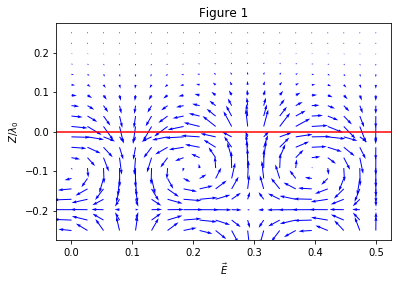

In [325]:
plt.figure(figsize = (200,200))
fig, ax = plt.subplots()
q = ax.quiver(x_plot,z_plot,E_x.real,E_z.real,color = "Blue")
plt.axhline(color='r', linestyle='-')
plt.title('Figure 1')
plt.xlabel(r"$ \vec E  $")
plt.ylabel(r"$ Z/\lambda_0  $")
plt.show()